# 1. Unsupervised Learning

In [1]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt

## 1. Generating the data

First, we will generate some data for this problem. Set the number of points $N=400$, their dimension $D=2$, and the number of clusters $K=2$, and generate data from the distribution $p(x|z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.
  Sample $200$ data points for $k=1$ and 200 for $k=2$, with

  $$
    \mu_1=
    \begin{bmatrix}
      0.1 \\
      0.1
    \end{bmatrix}
    \ \text{,}\
    \mu_2=
    \begin{bmatrix}
      6.0 \\
      0.1
    \end{bmatrix}
    \ \text{ and }\
    \Sigma_1=\Sigma_2=
    \begin{bmatrix}
      10       & 7 \\
      7 & 10
    \end{bmatrix}
  $$
  Here, $N=400$. Since you generated the data, you already know which sample comes from which class.
  Run the cell in the IPython notebook to generate the data.

In [2]:
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

Make a scatter plot of the data points showing the true cluster assignment of each point using different color codes and shape (x for first class and circles for second class):

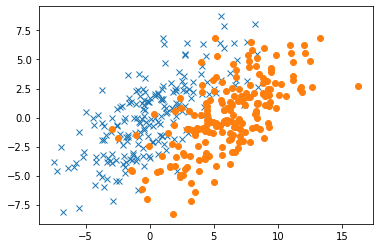

In [3]:
# Make a scatterplot for the data points showing the true cluster assignments of each point
plt.plot(xy_class1[:,0], xy_class1[:,1], 'x') # first class, x shape
plt.plot(xy_class2[:,0], xy_class2[:,1], 'o') # second class, circle shape

## 2. Implement and Run K-Means algorithm

Now, we assume that the true class labels are not known. Implement the k-means algorithm for this problem.
  Write two functions: `km_assignment_step`, and `km_refitting_step` as given in the lecture (Here, `km_` means k-means).
  Identify the correct arguments, and the order to run them. Initialize the algorithm with
  $$
    \hat\mu_1=
    \begin{bmatrix}
      0.0 \\
      0.0
    \end{bmatrix}
    \ \text{,}\
    \hat\mu_2=
    \begin{bmatrix}
      1.0 \\
      1.0
    \end{bmatrix}
  $$
  and run it until convergence.
  Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the cost vs. the number of iterations. Report your misclassification error.

In [4]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
        J += np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R[:, k])
    return J

In [5]:
# K-Means Assignment Step
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of clusters
    r = np.zeros((N,K))
    for k in range(K):
        r[:, k] = np.linalg.norm(Mu[:,k]-data, axis=1)
    arg_min = np.argmin(r, axis=1) # argmax/argmin along dimension 1
    R_new = np.zeros((N,K)) # Set to zeros/ones with shape (N, K)
    R_new[range(N), arg_min] = 1 # Assign to 1
    return R_new

In [6]:
# K-means Refitting Step
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of clusters
    Mu_new = np.matmul(data.T, R)/ np.sum(R, axis=0)
    return Mu_new

In [7]:
# Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 100
class_init = np.random.binomial(1., .5, size=N)
R = np.vstack([class_init, 1 - class_init]).T

Mu = np.zeros([D, K])
Mu[:, 1] = 1.
R.T.dot(data), np.sum(R, axis=0)

cost_results = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    Mu = km_refitting_step(data, R, Mu)
    cost_results.append(cost(data, R, Mu))

class_1 = np.where(R[:, 0])
class_2 = np.where(R[:, 1])

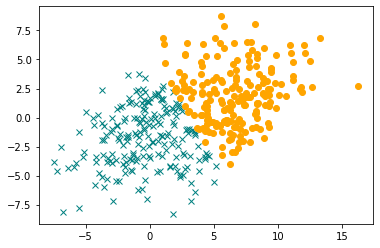

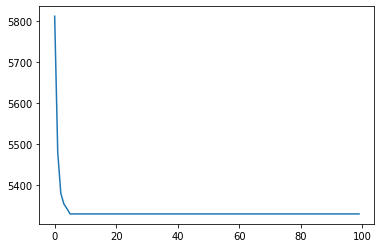

misclassification rate 0.25


In [8]:
# Make a scatterplot for the data points showing the K-Means cluster assignments of each point
plt.plot(data[class_1,0], data[class_1,1], 'x', color='teal') # first class, x shape
plt.plot(data[class_2,0], data[class_2,1], 'o', color='orange') # second class, circle shape
plt.show()
plt.plot(cost_results)
plt.show()
sumForBoth = 0
for pt in data[class_1, :2][0]:
    if pt in xy_class1[:,:2]:
        sumForBoth +=1
for pt in data[class_2, :2][0]:
    if pt in xy_class2[:,:2]:
        sumForBoth +=1
print("misclassification rate", 1-(sumForBoth)/(xy_class1[:, :2].shape[0]+xy_class2[:,:2].shape[0]))

## 3. Implement EM algorithm for Gaussian mixtures
Next, implement the EM algorithm for Gaussian mixtures.
  Write three functions: `log_likelihood`, `gm_e_step`, and `gm_m_step` as given in the lecture.
  Identify the correct arguments, and the order to run them.
  Initialize the algorithm with means as in Qs 2.1 k-means initialization, covariances with $\hat\Sigma_1=\hat\Sigma_2=I$,
  and $\hat\pi_1=\hat\pi_2$.

  In addition to the update equations in the lecture, for the M (Maximization) step, you also need to use this following equation to update the covariance $\Sigma_k$:
$$\hat{\mathbf{\Sigma}_k} = \frac{1}{N_k} \sum^N_{n=1} r_k^{(n)}(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})^{\top}$$
    
  Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

In [9]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

In [10]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = len(Pi) # number of mixtures
    L, T = 0., 0.
    for n in range(N):
        for k in range(K):
            T += Pi[k] * normal_density(data[n,:], Mu[:,k], Sigma[k]) # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients 
        L += np.log(T)
    return L

In [11]:
# Gaussian Mixture Expectation Step
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = len(Pi) # number of mixtures
    Gamma = np.zeros((N, K)) # zeros of shape (N,K), matrix of responsibilities
    for n in range(N):
        for k in range(K):
            Gamma[n, k] = Pi[k] * normal_density(data[n,:], Mu[:,k], Sigma[k]) 
        Gamma[n, :] /= np.sum(Gamma[n,:]) # Normalize by sum across second dimension (mixtures)
    return Gamma

In [12]:
# Gaussian Mixture Maximization Step
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Gamma.shape[1]  # number of mixtures
    Nk = np.sum(Gamma, axis=0) # Sum along first axis 
    Mu = (1./Nk)*np.matmul(data.T, Gamma)
    Sigma = [np.identity(D) for k in range(K)]
    for k in range(K):
        delta = data - Mu[:,k]
        A = np.eye(N)*Gamma[:,k] # N x N
        B = np.matmul(np.matmul( delta.T, A), delta)
        Sigma[k] = (1./Nk[k]) * B
    Pi = Nk/N
    return Mu, Sigma, Pi

In [13]:
# Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 
max_iter  = 200
loss = []

for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    loss.append(log_likelihood(data, Mu, Sigma, Pi)) # This function makes the computation longer, but good for debugging

class_1 = np.where(Gamma[:, 0] >= .5)
class_2 = np.where(Gamma[:, 1] >= .5)

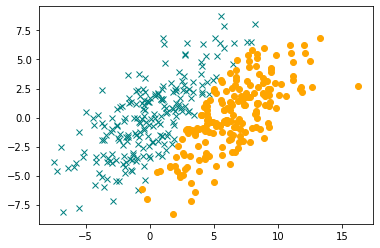

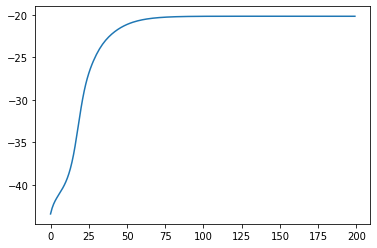

misclassification rate 0.10750000000000004


In [14]:
# Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point
plt.plot(data[class_1,0], data[class_1,1], 'x', color='teal') # first class, x shape
plt.plot(data[class_2,0], data[class_2,1], 'o', color='orange') # second class, circle shape
plt.show()
plt.plot(loss)
plt.show()
sumForBoth = 0
for pt in data[class_1, :2][0]:
    if pt in xy_class1[:,:2]:
        sumForBoth +=1
for pt in data[class_2, :2][0]:
    if pt in xy_class2[:,:2]:
        sumForBoth +=1
print("misclassification rate", 1-(sumForBoth)/(xy_class1[:,:2].shape[0]+xy_class2[:,:2].shape[0]))

## 4. Comment on findings + additional experiments

Comment on the results:

* Compare the performance of k-Means and EM based on the resulting cluster assignments.
* Compare the performance of k-Means and EM based on their convergence rate. What is the bottleneck for which method?
* Experiment with 5 different data realizations (generate new data), run your algorithms, and summarize your findings. Does the algorithm performance depend on different realizations of data?
 


- The performance of EM seems to be better that k-Means since the misclassification rate  of EM is overall lower than misclassification rate of k-Means.
- k-Means convergence rate is much higher as we can see from the loss graph, the bottleneck of k-Means is that it does not perform well when the decision boundary is relatively wide. On the other hand, EM has a more gradual convergence rate, however the bottleneck is that it can get trapped in local minimums.
- Afer running with 5 different sets of data, I realize that the performance does rely on the realizations of data. k-Means has an average misclassification rate of around 0.20 wheras EM has an average of around 0.08, however k-Means has a smaller variance and EM has a higher variance between each runs. Therefore we can conclude that the performance does rely on the realizations of data

# 2. Reinforcement Learning

There are 3 files:
1. `maze.py`: defines the `MazeEnv` class, the simulation environment which the Q-learning agent will interact in.
2. `qlearning.py`: defines the `qlearn` function which you will implement, along with several helper functions. Follow the instructions in the file. 
3. `plotting_utils.py`: defines several plotting and visualization utilities. In particular, you will use `plot_steps_vs_iters`, `plot_several_steps_vs_iters`, `plot_policy_from_q`

In [15]:
from qlearning import qlearn
from maze import MazeEnv
from plotting_utils import plot_steps_vs_iters, plot_several_steps_vs_iters, plot_policy_from_q

## 1. Basic Q Learning experiments

(a) Run your algorithm several times on the given environment. Use the following hyperparameters:
1. Number of episodes = 200
2. Alpha ($\alpha$) learning rate = 1.0
2. Maximum number of steps per episode = 100. An episode ends when the agent reaches a goal state, or uses the maximum number of steps per episode
3. Gamma ($\gamma$) discount factor = 0.9
4. Epsilon ($\epsilon$) for $\epsilon$-greedy = 0.1 (10% of the time). Note that we should "break-ties" when the Q-values are zero for all the actions (happens initially) by essentially choosing uniformly from the action. So now you have two conditions to act randomly: for epsilon amount of the time, or if the Q values are all zero. 


In [16]:
num_iters = 200
alpha = 1.
gamma = .9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# Instantiate the MazeEnv environment with default arguments
env = MazeEnv()

# Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

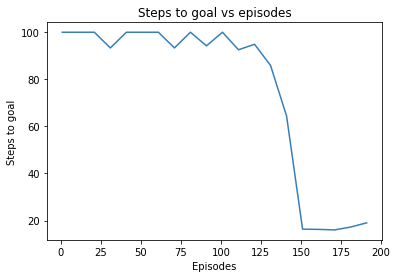

In [17]:
# Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Visualize the learned greedy policy from the Q values:

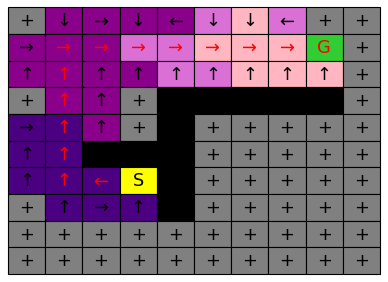

<Figure size 720x720 with 0 Axes>

In [18]:
# plot the policy from the Q value
plot_policy_from_q(q_hat, env)

(b) Run your algorithm by passing in a list of 2 goal locations: (1,8) and (5,6). Note: we are using 0-indexing, where (0,0) is top left corner. Report on the results.

In [19]:
num_iters = 200
alpha = 1.
gamma = .9
epsilon = .1
max_steps = 100
use_softmax_policy = False

# Set the goal
goal_locs = [(1,8), (5,6)]
env = MazeEnv(goals=goal_locs)

# Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

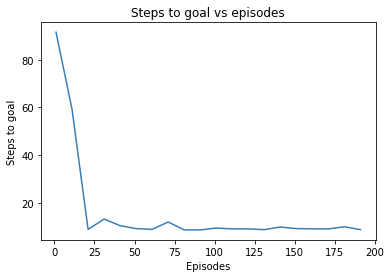

In [20]:
# Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Plot the steps to goal vs training iterations (episodes):

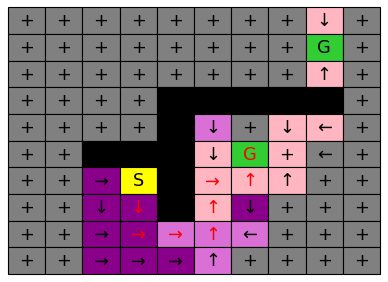

<Figure size 720x720 with 0 Axes>

In [21]:
# plot the policy from the Q values
plot_policy_from_q(q_hat, env)

## 2. Experiment with the exploration strategy, in the original environment

(a) Try different $\epsilon$ values in $\epsilon$-greedy exploration: We asked you to use a rate of $\epsilon$=10%, but try also 50% and 1%. Graph the results (for 3 epsilon values) and discuss the costs and benefits of higher and lower exploration rates.

In [22]:
num_iters = 200
alpha = 1.
gamma = .9
epsilon = .1
max_steps = 100
use_softmax_policy = False

# set the epsilon lists in increasing order:
epsilon_list = [.01,.1,.5]

env = MazeEnv()

steps_vs_iters_list = []
for epsilon in epsilon_list:
   q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
   steps_vs_iters_list.append(steps_vs_iters)

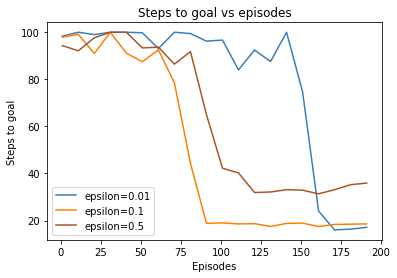

In [23]:
# Plot the results
label_list = ["epsilon={}".format(eps) for eps in epsilon_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

(b) Try exploring with policy derived from **softmax of Q-values** described in the Q learning lecture. Use the values of $\beta \in \{1, 3, 6\}$ for your experiment, keeping $\beta$ fixed throughout the training.

In [24]:
num_iters = 200
alpha = 1.
gamma = .9
epsilon = .1
max_steps = 100

# Set the beta
beta_list = [1,3,6]
use_softmax_policy = True
k_exp_schedule = 0. # (float) choose k such that we have a constant beta during training

env = MazeEnv()
steps_vs_iters_list = []
for beta in beta_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, beta, k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

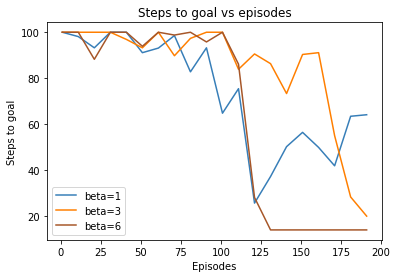

In [25]:
label_list = ["beta={}".format(beta) for beta in beta_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

(c) Instead of fixing the $\beta = \beta_0$ to the initial value, we will increase the value of $\beta$ as the number of episodes $t$ increase:

$$\beta(t) = \beta_0 e^{kt}$$

That is, the $\beta$ value is fixed for a particular episode.
Run the training again for different values of $k \in \{0.05, 0.1, 0.25, 0.5\}$, keeping $\beta_0 = 1.0$. Compare the results obtained with this approach to those obtained with a static $\beta$ value.

In [26]:
num_iters = 200
alpha = 1.
gamma = .9
epsilon = .1
max_steps = 100

# Set the beta
beta = 1.0
use_softmax_policy = True
k_exp_schedule_list = [.05,.1,.25,.5]
env = MazeEnv()

steps_vs_iters_list = []
for k_exp_schedule in k_exp_schedule_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, beta, k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

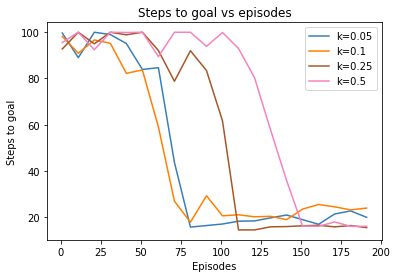

In [27]:
# Plot the steps vs iterations
label_list = ["k={}".format(k_exp_schedule) for k_exp_schedule in k_exp_schedule_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

## 3. Stochastic Environments

(a) Make  the  environment  stochastic  (uncertain),  such  that  the  agent  only  has  a  95% chance  of  moving  in  the  chosen  direction,  and  has  a  5%  chance  of  moving  in  some random direction.

In [28]:
# Implement ProbabilisticMazeEnv in maze.py
from maze import ProbabilisticMazeEnv

(b) Change the learning rule to handle the non-determinism, and experiment with different probability of environment performing random action $p_{rand} \in \{0.05, 0.1, 0.25, 0.5\}$ in this new rule. How does performance vary as the environment becomes more stochastic?

Use the same parameters as in first part, except change the alpha ($\alpha$) value to be **less than 1**, e.g. 0.5.

In [29]:
# Use the same parameters as in the first part, except change alpha
num_iters = 200
alpha = .5
gamma = .9
epsilon = .1
max_steps = 100
use_softmax_policy = False

# Set the environment probability of random
env_p_rand_list = [.05,.1,.25,.5]

steps_vs_iters_list = []
for env_p_rand in env_p_rand_list:
    # Instantiate with ProbabilisticMazeEnv
    env = ProbabilisticMazeEnv(MazeEnv(), p_random=env_p_rand)

    # Note: We will repeat for several runs of the algorithm to make the result less noisy
    avg_steps_vs_iters = np.zeros(num_iters)
    for i in range(10):
        q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
        avg_steps_vs_iters += steps_vs_iters
    avg_steps_vs_iters /= 10
    steps_vs_iters_list.append(avg_steps_vs_iters)

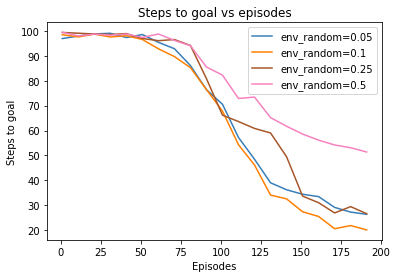

In [30]:
label_list = ["env_random={}".format(env_p_rand) for env_p_rand in env_p_rand_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

# 3. Did you complete the course evaluation?

In [31]:
#yes